<h2><font color='green'>
Capstone II Jupyter Notebook: Heart Disease Dataset</font></h2>


<h3><font color = 'gray'> Problem Statement: What opportunities exist for individuals to make lifestyle changes to decrease their risk of heart disease, focusing on data collected in 2015?</font color = 'gray'></h3>

<h4><font color = 'gray'>Criteria for success: Identify 2-3 factors that lead to an increased risk for heart disease/attack.<font color = 'gray'></h4>

<h3>PRELIMINARY STEPS:</h3>

<br>(a) Import libraries</br>
<br>(b) Import dataset</br>
<br>(c) View data </br>

In [11]:
#Preliminary Steps (a): import libairies
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [12]:
#import pandas specifically as it was not running when listed with other libraries
import pandas as pd

In [13]:
#Preliminary Step (b): import Heart Disease Dataset
Heart_Disease_Dataset = pd.read_csv("Heart_Disease_Dataset.csv",low_memory = False)

              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke       Diabetes   PhysActivity  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.443169       0.040571       0.296921       0.756544   
std         0.496761       0.197294       0.698160       0.429169   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

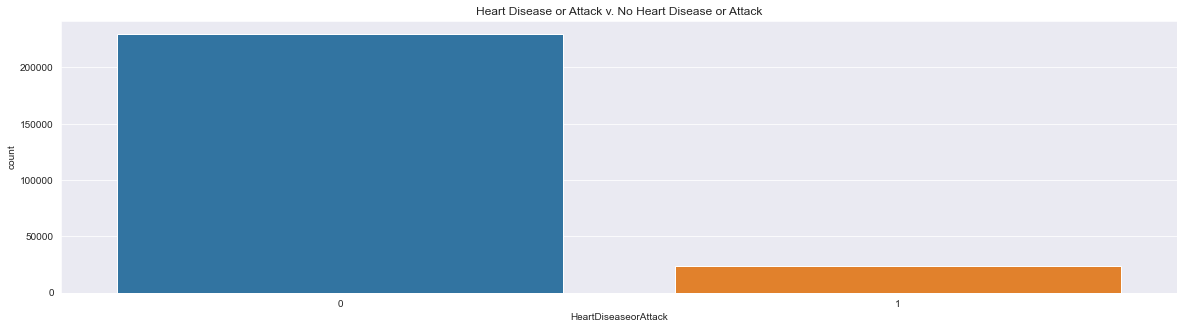

In [14]:
#Prelminary Step (c): View of information about the Heart Disease Dataset
print(Heart_Disease_Dataset.describe())
print(Heart_Disease_Dataset.info())

# Determine what percentage of the dataset had Heart Disease or an Attack.
total_size  = len(Heart_Disease_Dataset)

# Print the population size.
print(total_size)

# ACount how many individuals had heart disease or an attack.
AttackorDisease_count = sum(Heart_Disease_Dataset["HeartDiseaseorAttack"])

# Print the number of datapoints who had an attack or disease
print(AttackorDisease_count)

# Print the percentage of individuals who had heart disease or an attack within the total.
print(AttackorDisease_count / total_size)

# Bar graph of data
sns.countplot(x='HeartDiseaseorAttack', data = Heart_Disease_Dataset)
plt.title("Heart Disease or Attack v. No Heart Disease or Attack")
plt.show()


<h4><font color = 'gray'> Comments/findings re: PRELIMINARY STEPS </font></h4>
<br>1. 253680 separate entries</br>
<br>2. Most variables are binary (1 or 0, yes no) so mean and standard deviation don't provide extensive information.</br>
<br>3. Just over 9% of our dataset had Heart Disease or an Attack</br>

<h3>STEP 1: </h3>
<br>(a) Get a sense of the data by viewing the spread of variables separated by whether an individual had heart disease or an attack or not.</br>
<br>(b) Review data as a correlation heatmap and plot correlation coefficients.</br>

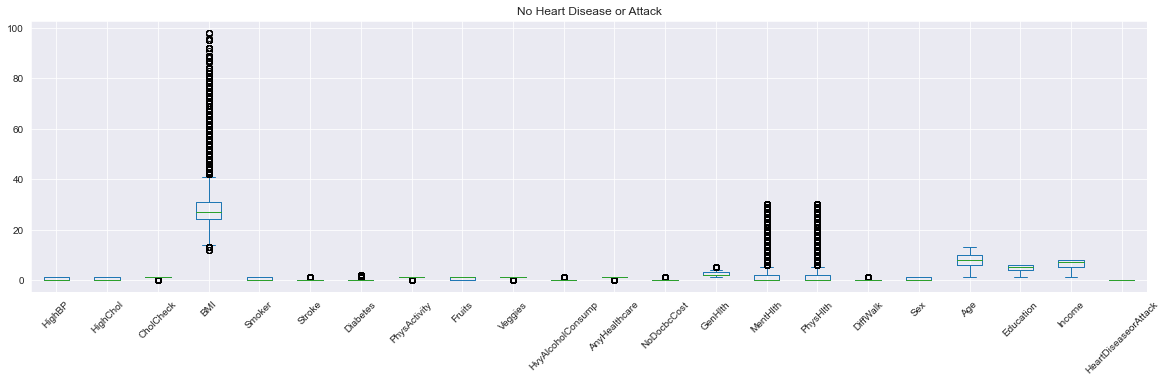

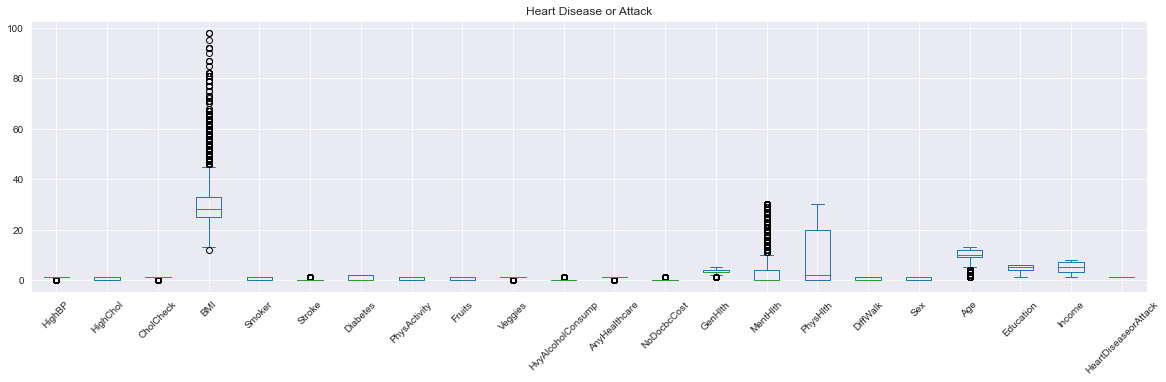

In [15]:
#STEP 1 (a): boxplots of all variables separated by whether the individual had heart disease or an attack
#No Heart Disease or Attack
condition_0 = Heart_Disease_Dataset['HeartDiseaseorAttack'] ==0
Heart_Disease_Dataset_0 = Heart_Disease_Dataset[condition_0]
Heart_Disease_Dataset_0.plot(kind = 'box')
plt.xticks(rotation = 45)
plt.title('No Heart Disease or Attack')
plt.show()

#Heart Disease or Attack
condition_1 = Heart_Disease_Dataset['HeartDiseaseorAttack'] ==1
Heart_Disease_Dataset_1 = Heart_Disease_Dataset[condition_1]
Heart_Disease_Dataset_1.plot(kind = 'box')
plt.xticks(rotation=45)
plt.title('Heart Disease or Attack')
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


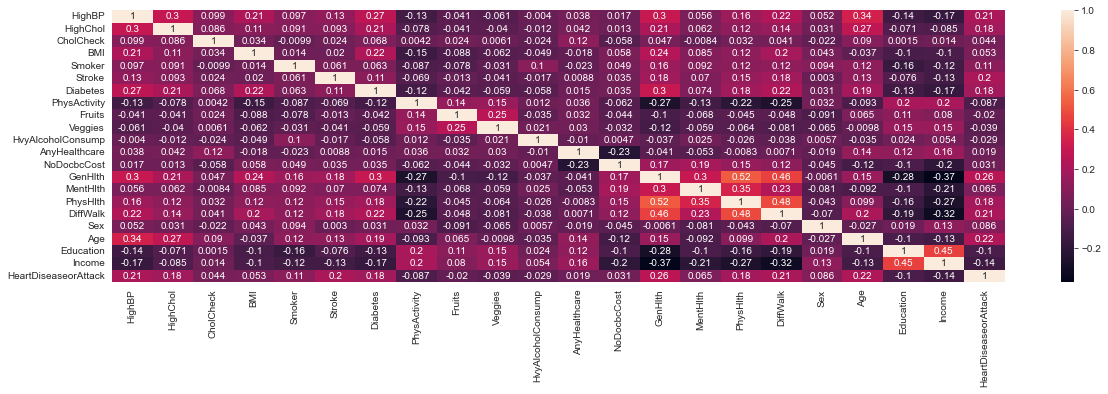

In [16]:
#STEP 1 (b): Correlation Heat Map
correlated_HeartDisease = Heart_Disease_Dataset.corr()
heatmap = sns.heatmap(correlated_HeartDisease, annot = True)
print(heatmap)


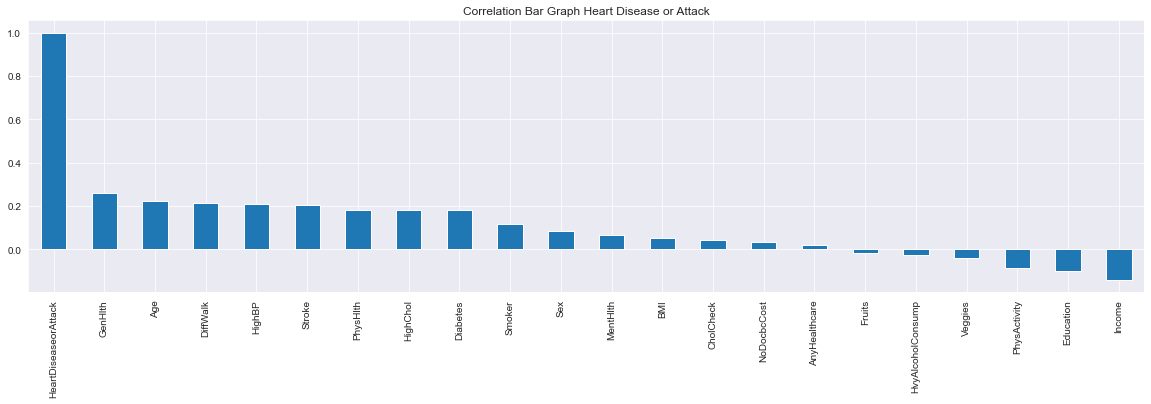

In [17]:
#STEP 1 (b): bar charts of correlation coefficients
bar_graph_data = correlated_HeartDisease['HeartDiseaseorAttack']
bar_graph_data_sorted = bar_graph_data.sort_values(ascending = False)
bar_graph_data_sorted.plot(kind = 'bar')
plt.title('Correlation Bar Graph Heart Disease or Attack')
plt.show()

<h4><font color = 'gray'>Analysis/Comments/Finding re: STEP 1</font></h4>

1. The spread of the variables most impacted when data is filtered for whether an individual has had heart disease or an attack appear to be: PhysHlth, Age, GenHlth
2. All correlation coefficients are very small, indicating moderate to weak correlations between each variable and heart disease or attack.
3. The strongest correlations appear to be with GenHlth, Age, DiffWalk(difficulty walking), HighBP and Stroke (all have correlation coefficients just over.2)

<h3> STEP 2: </h3>

<br>1. Explore mean for each variable</br>
<br>2. View crosstab charts of each variable</br>



In [18]:
#Mean of each variable

Heart_Disease_Dataset.groupby('HeartDiseaseorAttack').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,,,,,,,,,,,,,,,,,,,,,
0,0.395588,0.395314,0.959967,28.269624,0.424837,0.027656,0.256337,0.768625,0.637329,0.816360,...,0.949749,0.081401,2.422369,3.030306,3.731299,0.142567,0.426560,7.813858,5.082093,6.148050
1,0.750345,0.701168,0.988658,29.466622,0.619470,0.164776,0.687231,0.640355,0.604696,0.763906,...,0.963588,0.110869,3.367555,4.670322,9.154439,0.414975,0.572887,10.131210,4.745951,5.148161


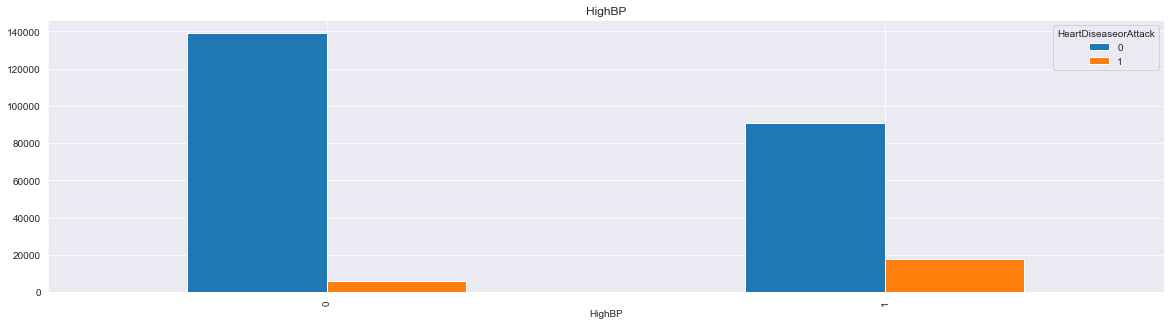

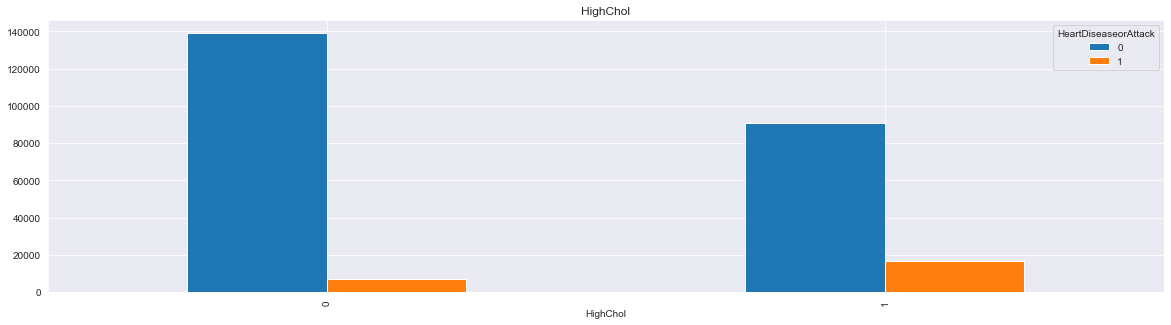

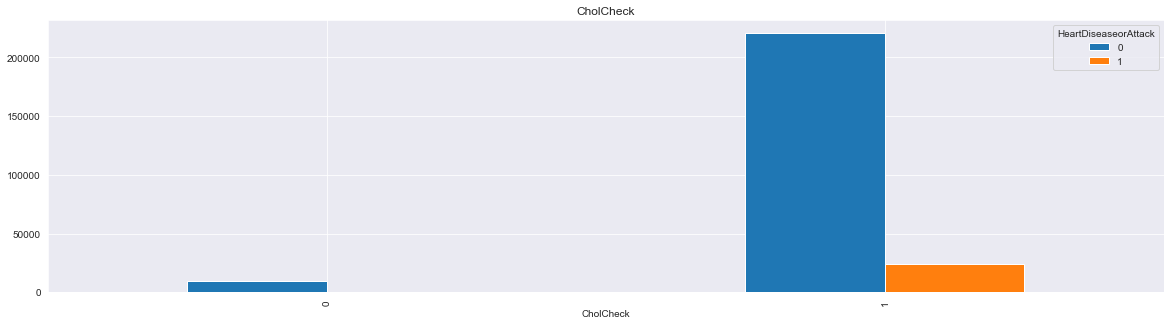

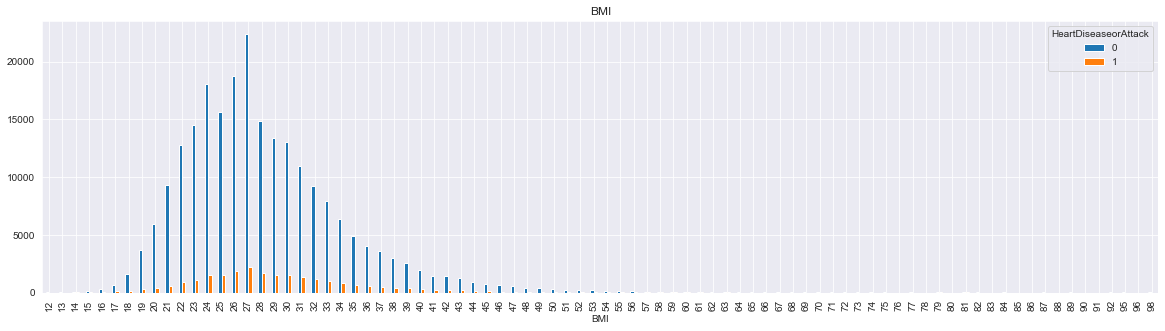

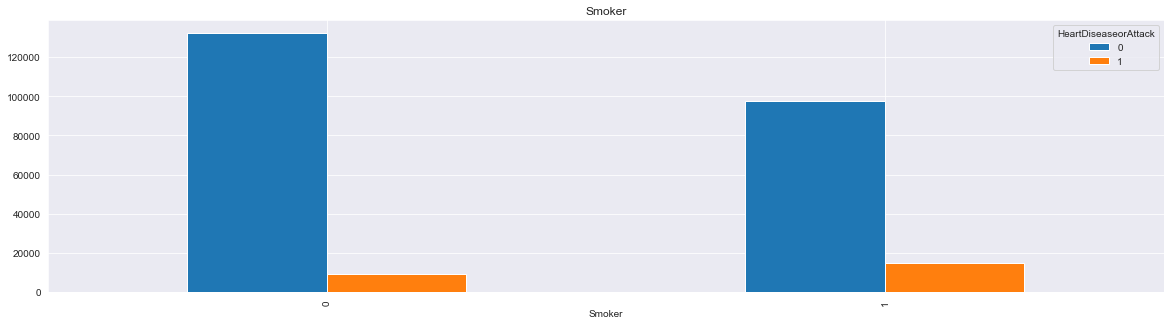

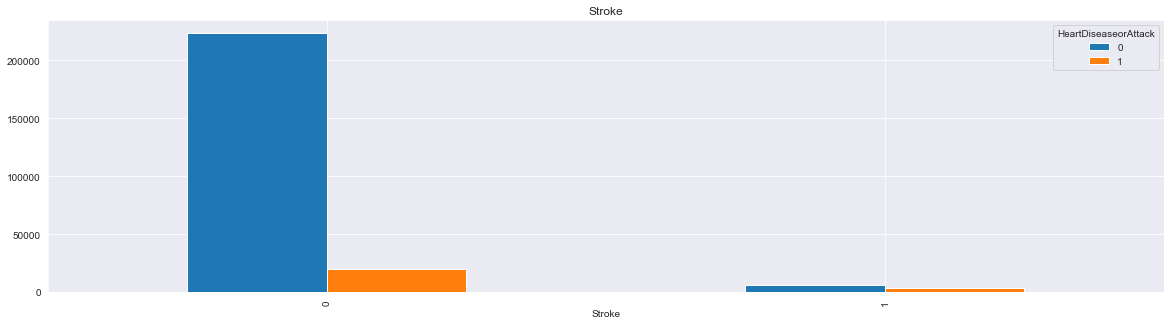

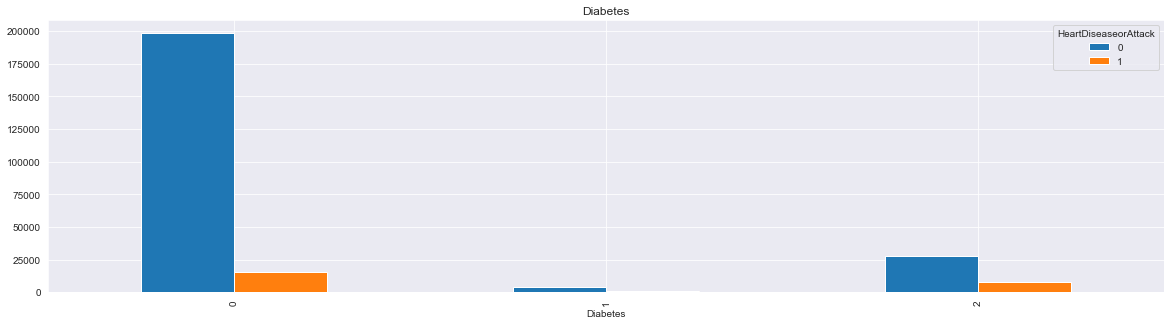

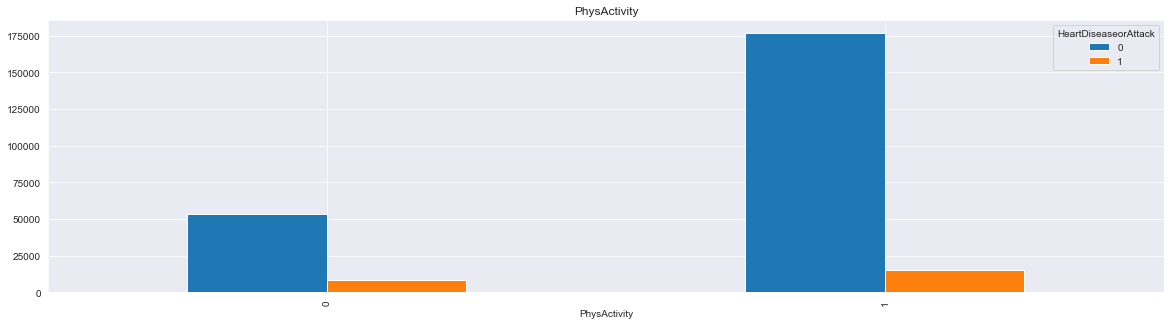

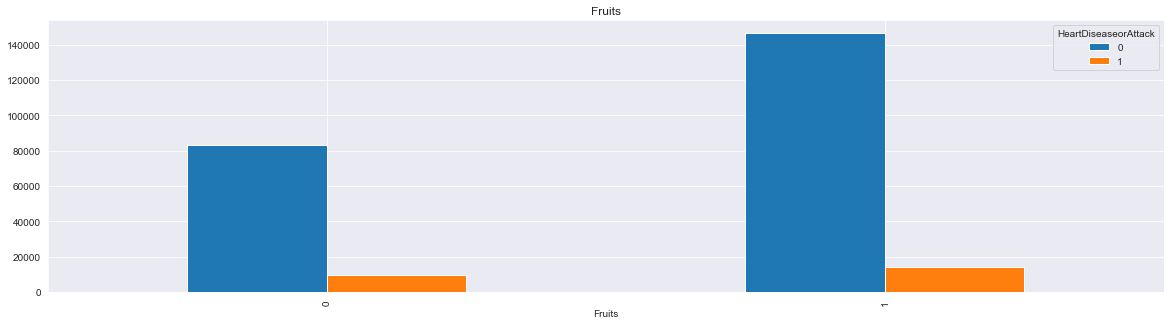

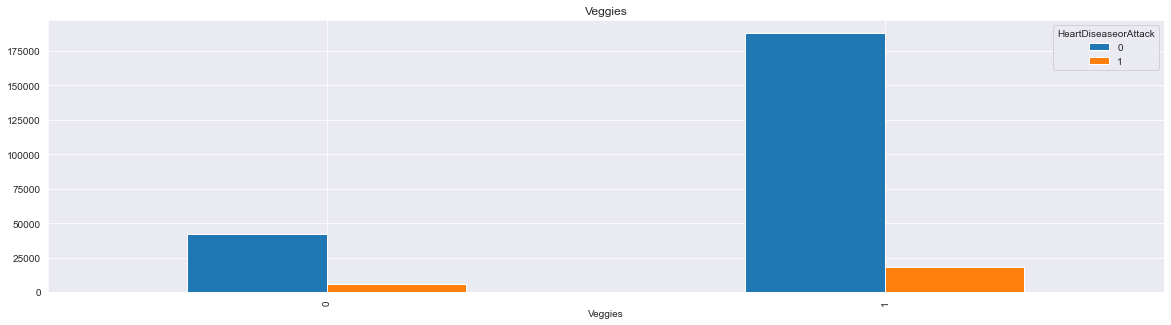

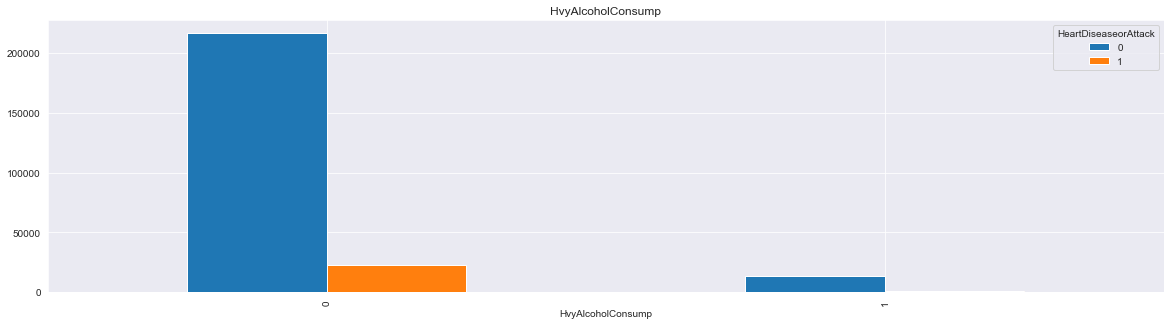

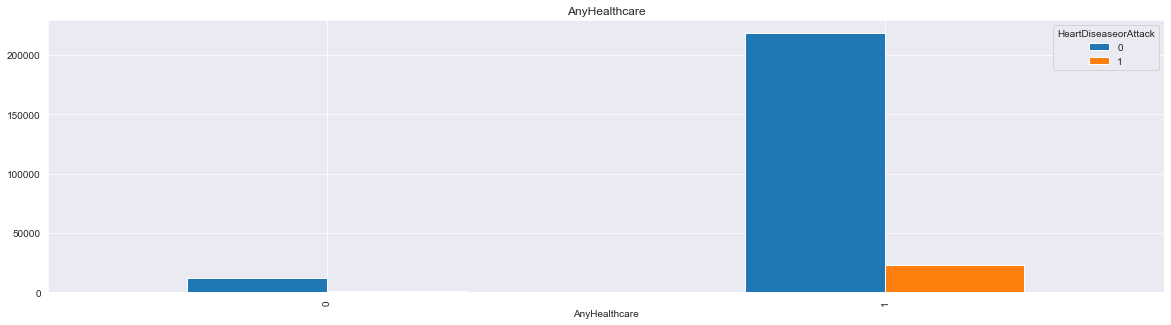

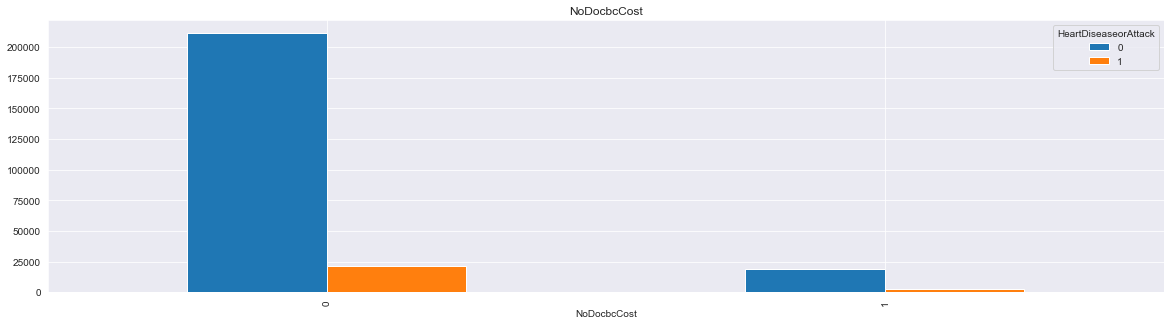

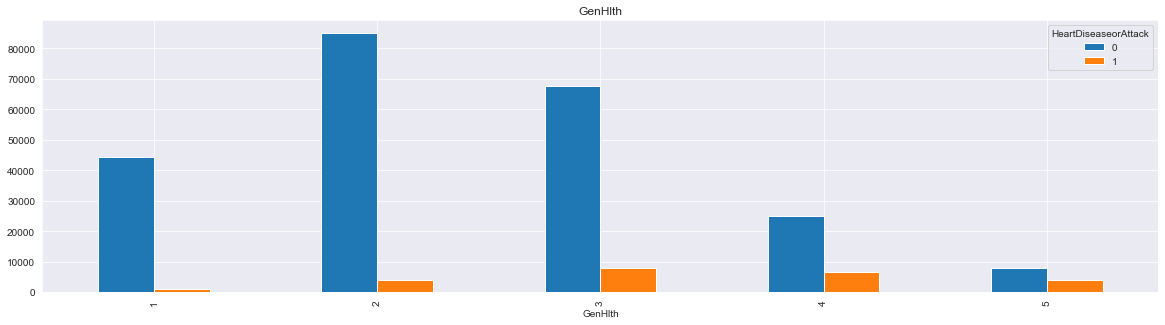

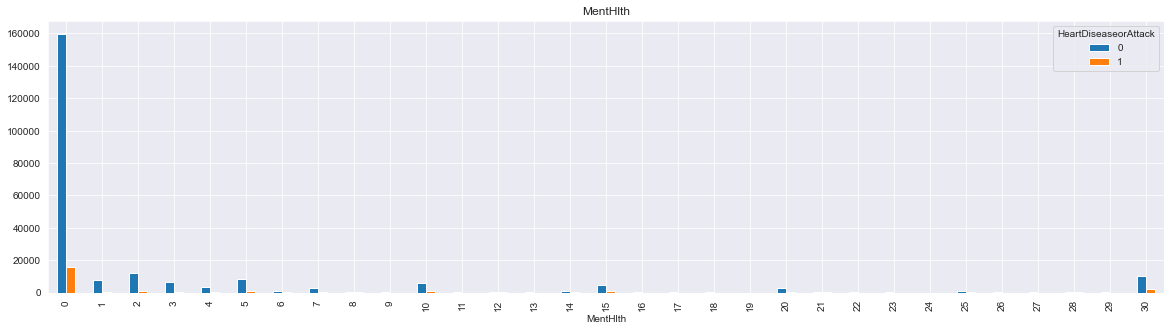

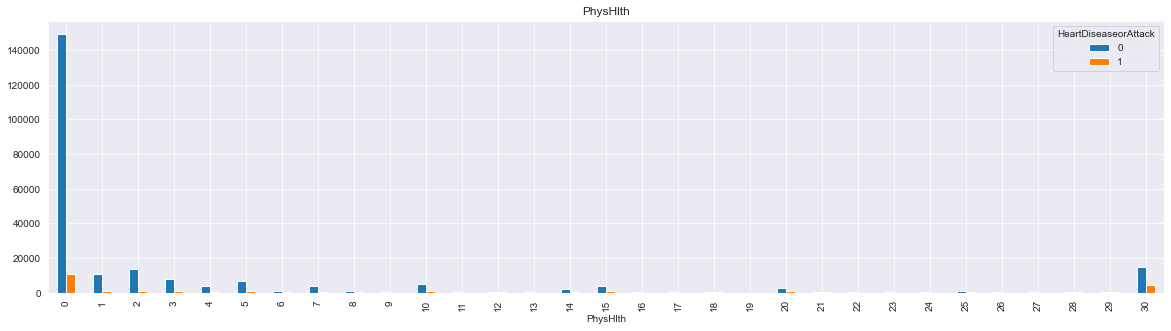

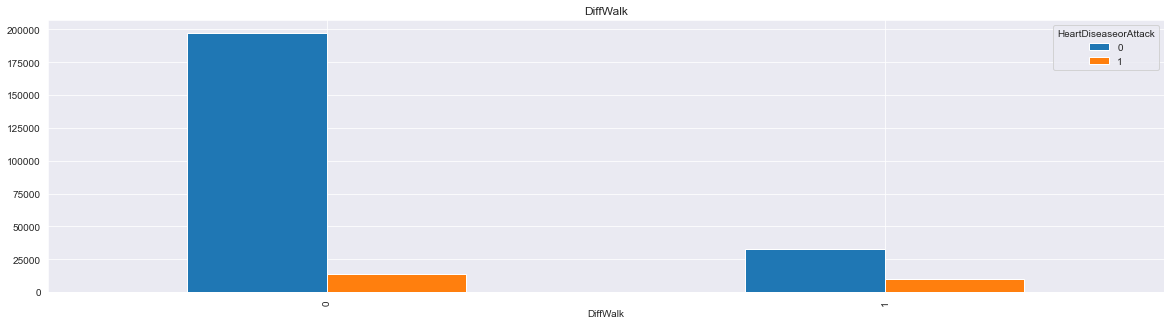

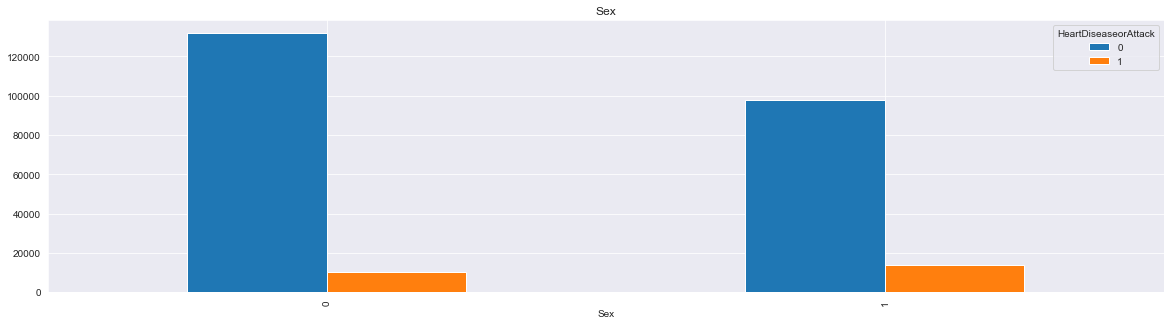

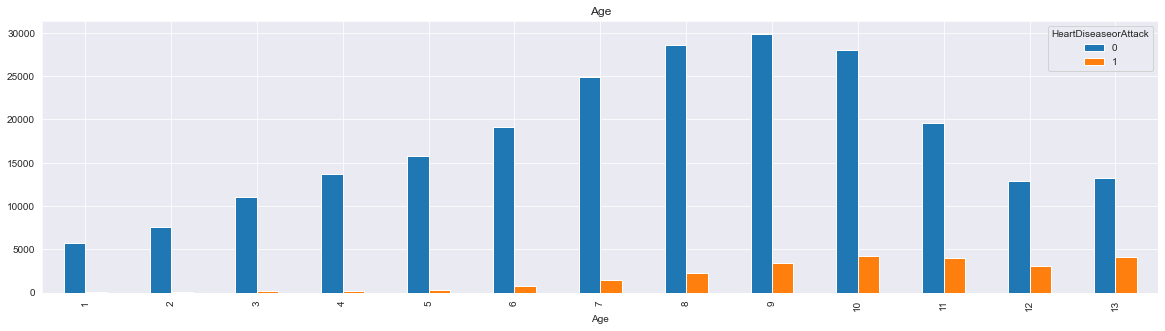

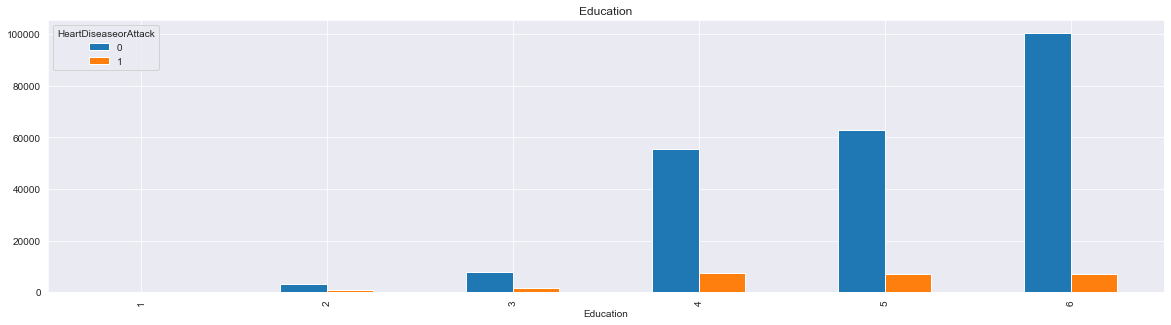

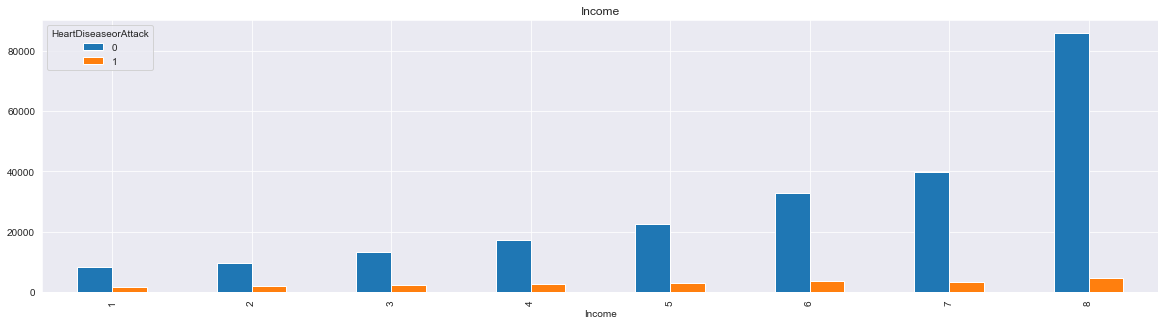

In [19]:
#Crosstab charts for each variable using a function

ListOfVariables = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for item in ListOfVariables:
    pd.crosstab(Heart_Disease_Dataset[item], Heart_Disease_Dataset["HeartDiseaseorAttack"]).plot(kind = 'bar')
    plt.title(item)
    plt.show()

<h3>STEP 3: Logistic Regression Model </h3>

In [34]:
#create model - modeled off of sample in https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = Heart_Disease_Dataset[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y=Heart_Disease_Dataset[["HeartDiseaseorAttack"]]
logit_model = sm.Logit(y, X, max_iter = 1000)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.254203
         Iterations 8
                            Results: Logit
Model:              Logit                Pseudo R-squared: 0.186      
Dependent Variable: HeartDiseaseorAttack AIC:              129014.2308
Date:               2022-06-27 12:02     BIC:              129233.5512
No. Observations:   253680               Log-Likelihood:   -64486.    
Df Model:           20                   LL-Null:          -79178.    
Df Residuals:       253659               LLR p-value:      0.0000     
Converged:          1.0000               Scale:            1.0000     
No. Iterations:     8.0000                                            
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
HighBP                 0.6537   0.0172  37.9281 0.0000  0.6199  0.6875
Hig

Stroke               2.783438
Sex                  1.931849
HighBP               1.922625
HighChol             1.870019
DiffWalk             1.566200
Diabetes             1.292471
GenHlth              1.231871
Smoker               1.199501
Age                  1.140180
PhysHlth             1.008901
MentHlth             0.995438
Fruits               0.959166
BMI                  0.945873
Income               0.922419
Veggies              0.895602
PhysActivity         0.832725
NoDocbcCost          0.809407
Education            0.774134
HvyAlcoholConsump    0.633817
AnyHealthcare        0.462121
CholCheck            0.294951
dtype: float64


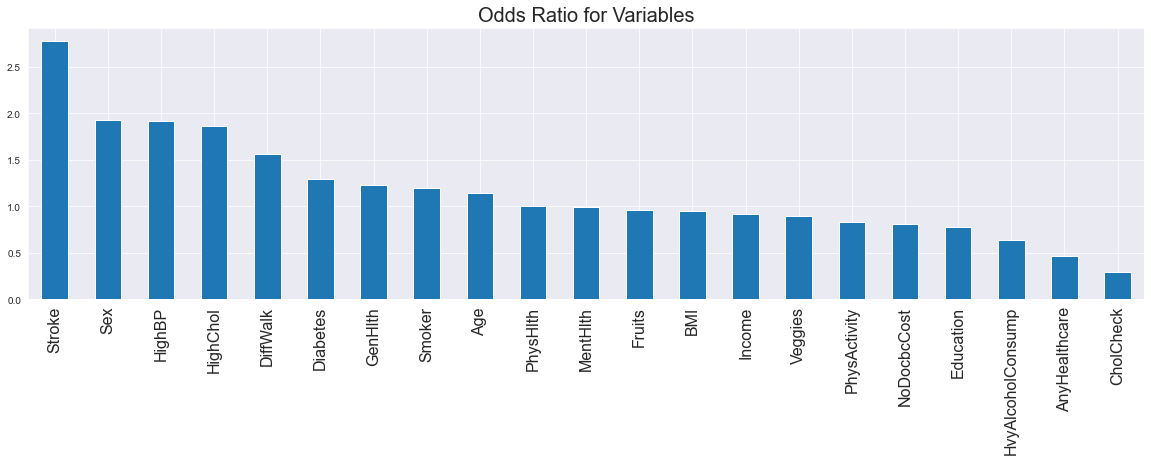

In [32]:
#odds ratio
odds_ratio = np.exp(result.params)

sorted_odds = odds_ratio.sort_values(ascending = False)
print(sorted_odds)
sorted_odds.plot(kind = 'bar')
plt.title('Odds Ratio for Variables', fontsize = 20)
plt.xticks(fontsize = 16)
plt.show()

In [22]:
#fit the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


C:\Users\abcon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression classifier on test set: 0.91


In [23]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[113611   1263]
 [ 10393   1573]]


In [24]:
#precision, recall, f1 score, support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    114874
           1       0.55      0.13      0.21     11966

    accuracy                           0.91    126840
   macro avg       0.74      0.56      0.58    126840
weighted avg       0.88      0.91      0.88    126840



In [25]:
#ROC score (modeled from sklearn.metrics import roc_auc_score)
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'roc_auc_score' is not defined

In [ ]:
#calculate AUC score
#import roc_auc_score
from sklearn.metrics import roc_auc_score
# Make predictions
predictions = logreg.predict_proba(X)
predictions_target = predictions[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, predictions_target)
print(round(auc,2))

<h4> Analysis/Comments/Findings </h4>

1. The P-Value for all variables is less than .05. Accordingly, all variables are associated with the outcome.
2. The psuedo R squared value of .186 is somewhat low
3. The AUC score of .85 suggests high predictability
4. Overall, the model appears to be a decently good fit
5. The highest log odds ratios are for: Stroke, Sex, HighChol and HighBP, suggesting that these variables are the most probative of whether an individual will have heart disease or a heart attack.

<h3>STEP 4: Look into variables that stand out</h3>

1. The highest log odds were for stroke, sex, HighChol, and HighBP so it is likely helpful to explore these variables in more depth.

In [ ]:
#View comparisons of the variables with the highest log odds ratios (Stroke, Sex, HighBP, HighChol

#Stroke
pd.crosstab(Heart_Disease_Dataset['Stroke'], Heart_Disease_Dataset['HeartDiseaseorAttack']).plot.bar()
plt.title('Stroke v. HeartDiseaseorAttack')
plt.show()

#Sex
pd.crosstab(Heart_Disease_Dataset['Sex'], Heart_Disease_Dataset['HeartDiseaseorAttack']).plot.bar()
plt.title('Sex v. HeartDiseaseorAttack')
plt.show()

#HighBP
pd.crosstab(Heart_Disease_Dataset['HighBP'], Heart_Disease_Dataset['HeartDiseaseorAttack']).plot.bar()
plt.title('HighBP v. HeartDiseaseorAttack')
plt.show()

#HighChol
pd.crosstab(Heart_Disease_Dataset['HighChol'], Heart_Disease_Dataset['HeartDiseaseorAttack']).plot.bar()
plt.title('High Cholesterol v. HeartDiseaseorAttack')
plt.show()

<h4>Analysis</h4>

1. Not surprisingly, a high proportion of those who had a stroke also had heart disease or an attack. However, the population overall is fairly small.

2. Interestingly, it looks like sex may play a strong role in whether an individual has a heart attack or disease. This variable is worth exploring further.

3. High BP and High Chol show very similar outcomes; both appear to be strong indicators of an individual having heart disease or an attack.

In [ ]:
#To get a stronger visual, I will now filter the dataset to only individuals who had heart disease or an attack
DiseaseorAttack = Heart_Disease_Dataset['HeartDiseaseorAttack'] == 1
DiseaseorAttack_Dataset = Heart_Disease_Dataset[DiseaseorAttack]

#Viewing number of individuals who had heart disease or attack and also had a stroke
ax = DiseaseorAttack_Dataset['Stroke'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.set_title('Individuals who had Heart Disease or Attack and a Stroke')
plt.show()

#Viewing number of individuals who had heart disease or attack by gender
ax = DiseaseorAttack_Dataset['Sex'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Individuals who had Heart Disease or Attack filtered Men v. Women')
plt.show()

#Viewing number of individuals who had heart disease or attack by HighBP
ax = DiseaseorAttack_Dataset['HighBP'].value_counts().plot(kind = 'bar')
ax.set_xlabel('HighBP')
ax.set_ylabel('Count')
ax.set_title('Individuals who had Heart Disease or Attack filtered HighBP')
plt.show()

#Viewing number of individuals who had heart disease or attack by HighChol
ax = DiseaseorAttack_Dataset['HighBP'].value_counts().plot(kind = 'bar')
ax.set_xlabel('HighChol')
ax.set_ylabel('Count')
ax.set_title('Individuals who had Heart Disease or Attack filtered HighChol')
plt.show()

<h4> Analysis </h4>

1. This view makes it quite clear that sex is something that should be looked at more carefully when predicting heart disease or an attack. High BP and High Chol show similar trends, but these are two areas that can be more easily improved, say, through diet and exercise.

<h3> Step 5: Filtering for Heart Disease or Attack and Males in the dataset </h3>

In [ ]:
Male_Attack = Heart_Disease_Dataset[(Heart_Disease_Dataset["HeartDiseaseorAttack"]==1) & (Heart_Disease_Dataset["Sex"]==1)]

sns.countplot(x='HighBP', hue = 'Sex', data = Male_Attack)
plt.title("Men with heart disease or attack: trends for HighBP and HighChol")
plt.show()

sns.countplot(x='HighBP', hue = 'Stroke', data = Male_Attack)
plt.title("Men with heart disease or attack: trends for HighBP and Stroke")
plt.show()

sns.countplot(x='HighChol', hue = 'Stroke', data = Male_Attack)
plt.title("Men with heart disease or attack: trends for HighBP and Stroke")
plt.show()

In [ ]:
Women_Attack = Heart_Disease_Dataset[(Heart_Disease_Dataset["HeartDiseaseorAttack"]==1) & (Heart_Disease_Dataset["Sex"]==0)]

sns.countplot(x='HighBP', hue = 'HighChol', data = Women_Attack)
plt.title("Women with heart disease or attack: trends for HighBP and HighChol")
plt.show()

sns.countplot(x='HighBP', hue = 'Stroke', data = Women_Attack)
plt.title("Women with heart disease or attack: trends for HighBP and Stroke")
plt.show()

sns.countplot(x='HighChol', hue = 'Stroke', data = Women_Attack)
plt.title("Women with heart disease or attack: trends for HighChol and Stroke")
plt.show()

<h4> Analysis/Comments/Findings</h4>

1. When viewing HighBP, HighChol and Stroke (when filtering for only those who have had heart disease or an attack and for sex) it appears that the trends are fairly similar for both men and women.
2. An indvidual who had heart disease or an attack likely had both high blood pressure and high cholesterol


<h3> Key Insights </h3>

1. The variables with the greatest odds ratio are Stroke, Sex, HighBP and HighChol.
2. Stroke appears to be the best predictor of a heart disease or attack. When the data is filtered into those who have had a disease or and attack, and those who have not had a disease or an attack, the proportion of individuals who have had a stroke is far larger within the dataset of those who have had heart disease or an attack.
3. Men appear more likely to be at risk for a heart disease or an attack, and being male is a good predictor of heart disease or attack risk. For example, men with high blood pressure and high cholesterol made up over 1/3 of all total individuals who suffered from heart disease or an attack.